In [1]:
from iterator import SmartIterator
from utils.visualization_utils import get_att_map, objdict, get_dict
from keras.models import load_model
from models import ReferringRelationshipsModel
from keras.utils import to_categorical
import numpy as np
import os
from PIL import Image
import json
import matplotlib.pyplot as plt
import h5py
from keras.models import Model
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


# VRD


In [2]:
annotations_test = json.load(open("data/VRD/annotations_test.json"))
img_dir = '/data/chami/VRD/sg_dataset/sg_test_images/'
vocab_dir = os.path.join('data/VRD')
model_checkpoint = "/data/chami/ReferringRelationships/models/VRD/11_02_2017_bis/ssn/2/model15-1.40.h5"

### Setup

In [4]:
predicate_dict, obj_subj_dict = get_dict(vocab_dir)
image_ids = sorted(list(annotations_test.keys()))[:1000]
params = objdict(json.load(open(os.path.join(os.path.dirname(model_checkpoint), "args.json"), "r")))
params.norm_scale=1
params.use_internal_loss = False
relationships_model = ReferringRelationshipsModel(params)
test_generator = SmartIterator(params.test_data_dir, params)
images = test_generator.get_image_dataset()

### Load the model.

In [5]:
model = relationships_model.build_model()
model.load_weights(model_checkpoint)

ResourceExhaustedError: OOM when allocating tensor with shape[1,1,1024,2048]
	 [[Node: res5a_branch1/kernel/Assign = Assign[T=DT_FLOAT, _class=["loc:@res5a_branch1/kernel"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/gpu:0"](res5a_branch1/kernel, res5a_branch1/random_uniform)]]

Caused by op 'res5a_branch1/kernel/Assign', defined at:
  File "/usr/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-9dfc251ca884>", line 1, in <module>
    model = relationships_model.build_model()
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/models.py", line 56, in build_model
    return self.build_ssn_model()
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/models.py", line 76, in build_ssn_model
    im_features = self.build_image_model(input_im)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/models.py", line 219, in build_image_model
    input_shape=(self.input_dim, self.input_dim, 3))
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/keras/applications/resnet50.py", line 228, in ResNet50
    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/keras/applications/resnet50.py", line 116, in conv_block
    name=conv_name_base + '1')(input_tensor)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/keras/engine/topology.py", line 575, in __call__
    self.build(input_shapes[0])
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/keras/layers/convolutional.py", line 134, in build
    constraint=self.kernel_constraint)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/keras/legacy/interfaces.py", line 87, in wrapper
    return func(*args, **kwargs)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/keras/engine/topology.py", line 399, in add_weight
    constraint=constraint)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/keras/backend/tensorflow_backend.py", line 316, in variable
    v = tf.Variable(value, dtype=_convert_string_dtype(dtype), name=name)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/tensorflow/python/ops/variables.py", line 197, in __init__
    expected_shape=expected_shape)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/tensorflow/python/ops/variables.py", line 306, in _init_from_args
    validate_shape=validate_shape).op
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/tensorflow/python/ops/state_ops.py", line 270, in assign
    validate_shape=validate_shape)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/tensorflow/python/ops/gen_state_ops.py", line 47, in assign
    use_locking=use_locking, name=name)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/afs/cs.stanford.edu/u/chami/ReferringRelationships/.env/lib/python3.4/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[1,1,1024,2048]
	 [[Node: res5a_branch1/kernel/Assign = Assign[T=DT_FLOAT, _class=["loc:@res5a_branch1/kernel"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/gpu:0"](res5a_branch1/kernel, res5a_branch1/random_uniform)]]


In [ ]:
output = model.get_layer("before-pred-subj").output
before_pred = Model(inputs=model.input, outputs=output)
output = model.get_layer("after-pred-subj").output
after_pred = Model(inputs=model.input, outputs=output)

### USER INPUT - Pick an image 

753


(-0.5, 223.5, 223.5, -0.5)

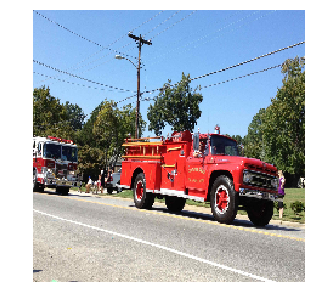

In [104]:
#################
image_index = np.random.randint(1000)
print(image_index)
#################
img = Image.open(os.path.join(img_dir, image_ids[image_index]))
img = img.resize((params.input_dim, params.input_dim))
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis("off")

### USER INPUT - Pick a relationship 

In [113]:
#################
subj = "truck"
predicate = "on the right of"
obj = "truck"
#################
subj_id = np.zeros((1, 1))
predicate_id = np.zeros((1, params.num_predicates))
obj_id = np.zeros((1, 1))
relationship = [subj, predicate, obj]
subj_id[0, 0] = obj_subj_dict.index(subj)
predicate_id[0, predicate_dict.index(predicate)] = 1
obj_id[0, 0] = obj_subj_dict.index(obj)

### Run the model and visualize the heatmaps.

(-0.5, 671.5, 223.5, -0.5)

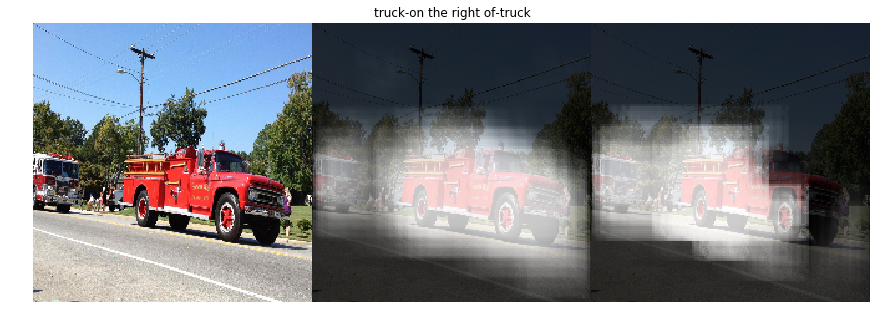

In [114]:
subject_heatmap, object_heatmap = model.predict([images[image_index:image_index+1], subj_id, predicate_id, obj_id])
att_map = get_att_map(img, np.maximum(subject_heatmap[0],0), np.maximum(object_heatmap[0],0), params.input_dim, relationship)
plt.figure(figsize=(15, 15))
plt.imshow(att_map)
plt.title("-".join(relationship))
plt.axis("off")

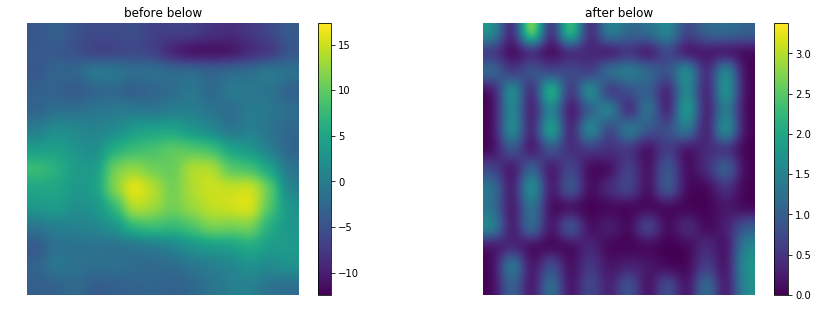

In [109]:
interp_method = 'gaussian'
map_1 = before_pred.predict([images[image_index:image_index+1], subj_id, predicate_id, obj_id])
map_2 = after_pred.predict([images[image_index:image_index+1], subj_id, predicate_id, obj_id])
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
img_1 = map_1.reshape((params.feat_map_dim, params.feat_map_dim))
plot0 = axes[0].imshow(img_1, interpolation=interp_method)
plot1 = axes[1].imshow(map_2.reshape((params.feat_map_dim, params.feat_map_dim)), interpolation=interp_method)
fig.colorbar(plot0, ax=axes[0])
axes[0].axis("off")
axes[0].set_title("before {}".format(predicate))
axes[1].axis("off")
axes[1].set_title("after {}".format(predicate))
fig.colorbar(plot1, ax=axes[1])

Text(0.5,1,'after-pred below')

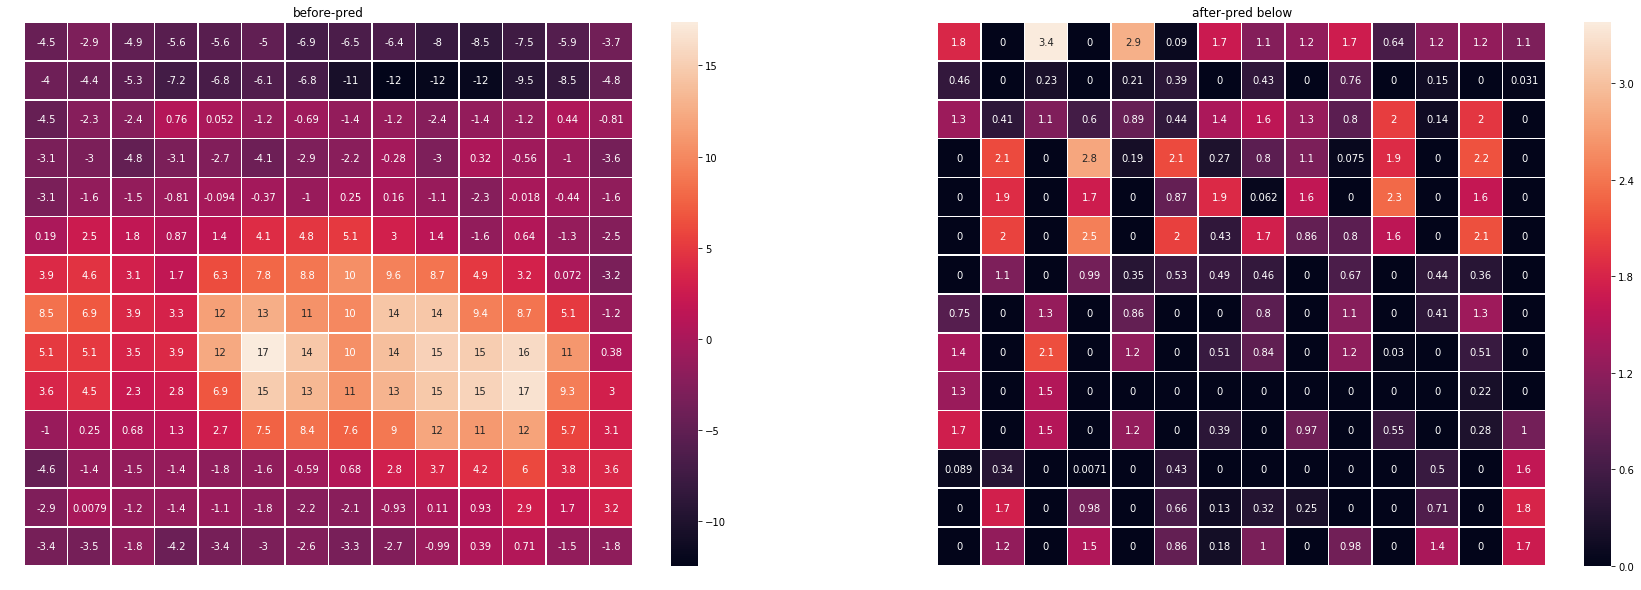

In [110]:
map_1 = before_pred.predict([images[image_index:image_index+1], subj_id, predicate_id, obj_id]).reshape((params.feat_map_dim, params.feat_map_dim))
map_2 = after_pred.predict([images[image_index:image_index+1], subj_id, predicate_id, obj_id]).reshape((params.feat_map_dim, params.feat_map_dim))
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
sns.heatmap(map_1, annot=True, linewidths=.5, ax=axes[0])
sns.heatmap(map_2, annot=True, linewidths=.5, ax=axes[1])
for i in range(2):
    axes[i].axis("off")
axes[0].set_title("before-pred")
axes[1].set_title("after-pred {}".format(predicate))

# Clevr

In [ ]:
annotations_test = json.load(open("/data/ranjaykrishna/ReferringRelationships/data/clevr/annotations_test.json"))
test_data_dir = '/data/ranjaykrishna/ReferringRelationships/data/dataset-clevr-small/test/'
img_dir = '/data/ranjaykrishna/clevr/images/val/'
vocab_dir = '/data/chami/ReferringRelationships/data/Clevr/'
model_checkpoint = "/data/chami/ReferringRelationships/models/Clevr/10_14_2017/2/model04-0.13.h5"
predicate_dict, obj_subj_dict = get_dict(vocab_dir)
image_ids = sorted(list(annotations_test.keys()))[:1000]
params = objdict(json.load(open(os.path.join(os.path.dirname(model_checkpoint), "args.json"), "r")))
params.use_internal_loss = False
params.categorical_predicate = False
#relationships_model = ReferringRelationshipsModel(params)
test_generator = SmartIterator(test_data_dir, params)
images = test_generator.get_image_dataset()
subj_id = np.zeros((1, 1))
predicate_id = np.zeros((1, params.num_predicates))
obj_id = np.zeros((1, 1))

In [ ]:
#################
image_index = 0 
#################
import seaborn as sns
cmap_2 = sns.cubehelix_palette(8, start=2, rot=0, dark=0.3, light=.95, reverse=True, as_cmap=True)
fig, axes = plt.subplots(1, 3, figsize=(15,5))
img = Image.open(os.path.join(img_dir, image_ids[image_index]))
img = img.resize((params.input_dim, params.input_dim))
axes[0].imshow(img)
axes[0].axis("off")
axes[0].set_title("Original image")
axes[1].imshow(255*test_generator[0][1][0][0].reshape(224,224),cmap=cmap_2)
axes[1].axis("off")
axes[1].set_title("Subject bounding box")
axes[2].imshow(255*test_generator[0][1][1][0].reshape(224,224),cmap=cmap_2)
axes[2].axis("off")
axes[2].set_title("Object bounding box")